<a href="https://colab.research.google.com/github/JesseK18/Cogntive_Neuroscience/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding for COGNEURO


In [1]:
! conda install -c conda-forge tensorflow
!pip install snntorch


/bin/bash: line 1: conda: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.3/125.3 kB 3.5 MB/s eta 0:00:00


In [2]:
# Importing used packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import snntorch as snn
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torchvision import datasets, transforms




# Loading external data


In [4]:

digits_X = np.load('digits_X.npy')
digits_y = np.load('digits_y.npy')

# Print the first few rows to confirm the data
print(digits_X[:5])  # For large arrays, show only the first 5 rows
print(digits_y[:5])

# Reshape the feature matrix to 2D
digits_X_reshaped = digits_X.reshape(digits_X.shape[0], -1)

# Convert to DataFrame
df_X = pd.DataFrame(digits_X_reshaped)
df_y = pd.DataFrame(digits_y, columns=['Label'])
print("Shape of df_X:", df_X.shape)
print("Shape of df_y:", df_y.shape)
print(df_X.head(20))  # First 5 rows of the feature matrix

print(df_y.head(20))  # First 5 labels


[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 2 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 1 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[0 1 2 3 4]
Shape of df_X: (290, 784)
Shape of df_y: (290, 1)
    0    1    2    3    4    5    6    7    8    9    ...  774  775  776  777  \
0     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1     0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2     0    0    0    0    0    0    0    1    1    0  .

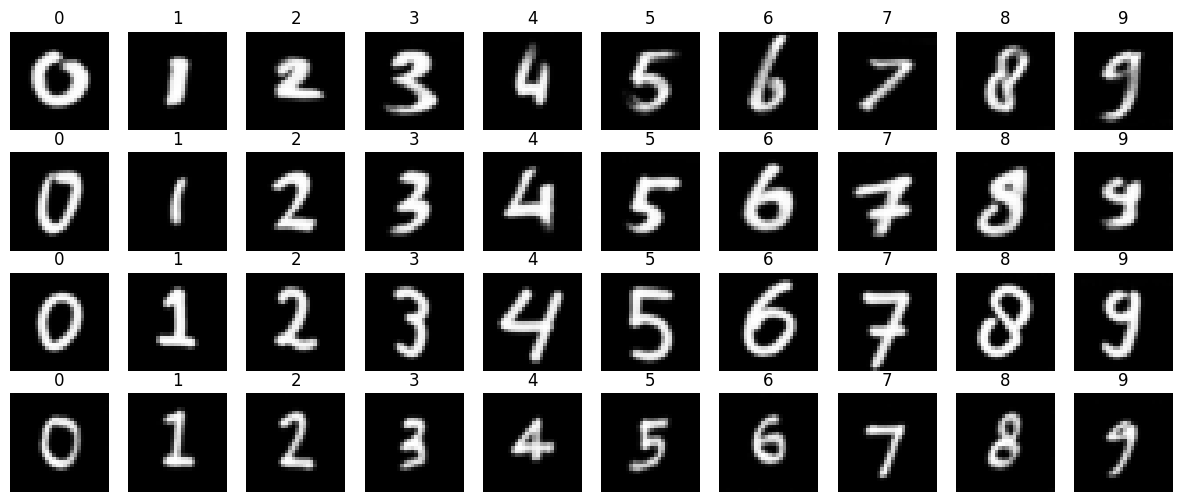

In [5]:

# load. Ensure you get the path correct -- this code assumes the files are in the working directory
X_test2 = np.load('./digits_X.npy')
y_test2 = np.load('./digits_y.npy')

# plot to see if loaded correctly
f, ax = plt.subplots(4,10, figsize=(15,6))
ax = ax.ravel()
for i in range(40):
    ax[i].imshow(X_test2[i,:,:], cmap='Greys_r')
    ax[i].set_title(y_test2[i])
    ax[i].axis('off')

# Creating 3 models accroding to the workgroup demands

In [6]:
"""Create the three models described in the report"""
# Define the model
model_1_hidden = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),  # 1 hidden layer with 128 nodes
    Dense(10, activation='softmax')  # Output layer with 10 nodes (for 10 classes)
])

# Compile the model
model_1_hidden.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_1_hidden.summary()


# Define the model
model_3_hidden = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_3_hidden.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_3_hidden.summary()


# Define the model
model_3_conv = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 32 filters, 3x3 kernel
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])


# Compile the model
model_3_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model_3_conv.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,962 (367.04 KB)

 Trainable params: 93,962 (367.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training the CNN on the MNIST and external dataset with the convolutional network

In [7]:
"""Train the CNN on the MNIST and test/ evaluate the model to check how accurate it is"""
np.random.seed(42)
#Load the external dataset

X_test2 = np.load('./digits_X.npy')
y_test2 = np.load('./digits_y.npy')

# Normalize and reshape the external validation dataset
X_test2 = X_test2 / 255.0
X_test2 = X_test2.reshape(-1, 28, 28, 1)

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize and reshape the data
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Train the models
history_1 = model_3_conv.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
history_2 = model_1_hidden.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
history_3 = model_3_hidden.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Plot the accs for the 3 models
final_train_accuracy_1 = history_1.history['accuracy'][-1]
final_val_accuracy_1 = history_1.history['val_accuracy'][-1]
external_test_loss_1, external_test_accuracy_1 = model_3_conv.evaluate(X_test2, y_test2, verbose=0)

final_train_accuracy_2 = history_2.history['accuracy'][-1]
final_val_accuracy_2 = history_2.history['val_accuracy'][-1]
external_test_loss_2, external_test_accuracy_2 = model_1_hidden.evaluate(X_test2, y_test2, verbose=0)

final_train_accuracy_3 = history_3.history['accuracy'][-1]
final_val_accuracy_3 = history_3.history['val_accuracy'][-1]
external_test_loss_3, external_test_accuracy_3 = model_3_hidden.evaluate(X_test2, y_test2, verbose=0)

# Print results in a structured way
print(f"{'Model':<15}{'Train Acc':<15}{'Val Acc':<15}{'External Test Acc':<20}")
print(f"{'-'*65}")
print(f"{'model_3_conv':<15}{final_train_accuracy_1:<15.4f}{final_val_accuracy_1:<15.4f}{external_test_accuracy_1:<20.4f}")
print(f"{'model_1_hidden':<15}{final_train_accuracy_2:<15.4f}{final_val_accuracy_2:<15.4f}{external_test_accuracy_2:<20.4f}")
print(f"{'model_3_hidden':<15}{final_train_accuracy_3:<15.4f}{final_val_accuracy_3:<15.4f}{external_test_accuracy_3:<20.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.8791 - loss: 0.3992 - val_accuracy: 0.9780 - val_loss: 0.0781
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - accuracy: 0.9782 - loss: 0.0704 - val_accuracy: 0.9847 - val_loss: 0.0548
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.9851 - loss: 0.0482 - val_accuracy: 0.9846 - val_loss: 0.0532
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9888 - loss: 0.0349 - val_accuracy: 0.9870 - val_loss: 0.0465
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9844 - val_loss: 0.0563
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8809 - loss: 0.4308 - val_accuracy: 0.9576 - val_loss: 0.1443
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9644 - loss: 0.1215 - val_accuracy: 0.9690 - val_loss: 0.1021
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━

<Figure size 1000x800 with 0 Axes>

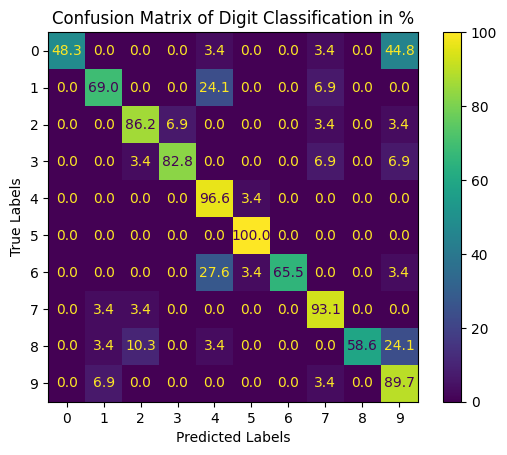

In [14]:
# create confusion matrix
np.random.seed(42)
y_pred2 = model_3_conv.predict(X_test2, verbose=0)
y_pred_classes = np.argmax(y_pred2, axis=1)
conf_matrix = confusion_matrix(y_test2, y_pred_classes)
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1, keepdims=True) * 100

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percentage, display_labels=np.arange(10))
disp.plot(cmap='viridis', colorbar=True, values_format='.1f')
plt.title("Confusion Matrix of Digit Classification in %")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


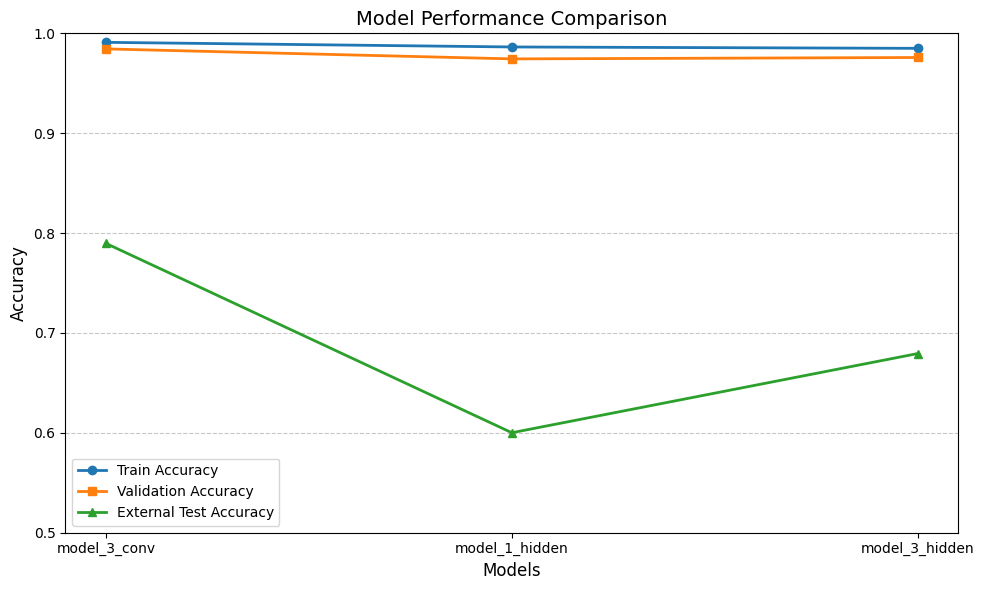

In [9]:
# group data together
models = ['model_3_conv', 'model_1_hidden', 'model_3_hidden']
train_accuracies = [final_train_accuracy_1, final_train_accuracy_2, final_train_accuracy_3]
val_accuracies = [final_val_accuracy_1, final_val_accuracy_2, final_val_accuracy_3]
external_test_accuracies = [external_test_accuracy_1, external_test_accuracy_2, external_test_accuracy_3]

# Plot the accuracies using a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, train_accuracies, marker='o', label='Train Accuracy', linewidth=2)
plt.plot(models, val_accuracies, marker='s',label='Validation Accuracy', linewidth=2)
plt.plot(models, external_test_accuracies, marker='^', label='External Test Accuracy', linewidth=2)

# Nitty gritty
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14)
plt.ylim(0.5, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [10]:
"""Comparing size of datasets"""
# Load the external dataset
digits_X = np.load('digits_X.npy')
digits_y = np.load('digits_y.npy')

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Load and print number of digits
num_digits_external = digits_X.shape[0]
num_digits_mnist = X_train.shape[0] + X_test.shape[0]
print(f"Number of digits in the external dataset: {num_digits_external}")
print(f"Number of digits in the MNIST dataset: {num_digits_mnist}")

Number of digits in the external dataset: 290
Number of digits in the MNIST dataset: 70000
